# **Week 9 Activity**

### Tasks

Do the following on the dataset
1. Explain the dataset.
2. Check the summary statistics and discuss the max, min, avg, median,and percentiles.
3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper).

Comment on your findings.

### T1. Explain the dataset.

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
# Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns
# Importing scipy itself
import scipy

In [14]:
# Reading Data to a pd.Dataframe
ad = pd.read_csv("Advertising.csv")
ad.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
# Dropping an obsolete column
ad.drop(columns=["Unnamed: 0"], inplace=True)
ad.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [16]:
# Generic information about the Dataframe
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [39]:
ad.isna().sum().to_frame('Null value count')

,Null value count
TV,0
Radio,0
Newspaper,0
Sales,0


<AxesSubplot:>

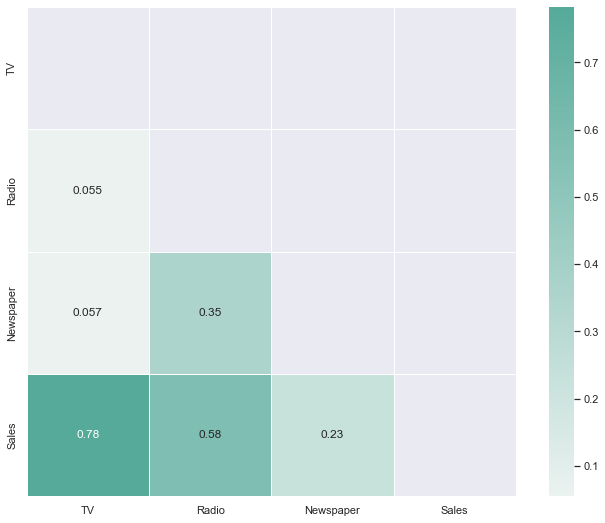

In [85]:
corrmatrix = ad.corr()
plt.subplots(figsize=(12,9))
colormap = sns.color_palette("light:#5A9", as_cmap=True)
# Generating a mask for the upper triangle
mask = np.zeros_like(corrmatrix)
mask[np.triu_indices_from(mask)] = True
# Heatmap with the mask
sns.heatmap(corrmatrix,mask=mask, square=True, annot=True, linewidth=0.75, cmap=colormap)

### Insights :
* This Dataset explains about the expenditure details of 3 Advertising categories named TV, Radio & Newspaper and the corresponding sales volume of a company.
* No null values present in the Dataset.
* There are 200 entries spread in 4 features.
* All of the entries are in float64 format.
* From the heatmap it is evident that the sales volume is highly affected (In a +ve manner) by Advertising by TV followed by Radio.

### T2. Check the summary statistics and discuss the max, min, avg, median,and percentiles.

In [49]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [124]:
ad.agg([np.median])

,TV,Radio,Newspaper,Sales
median,149.75,22.9,25.75,12.9


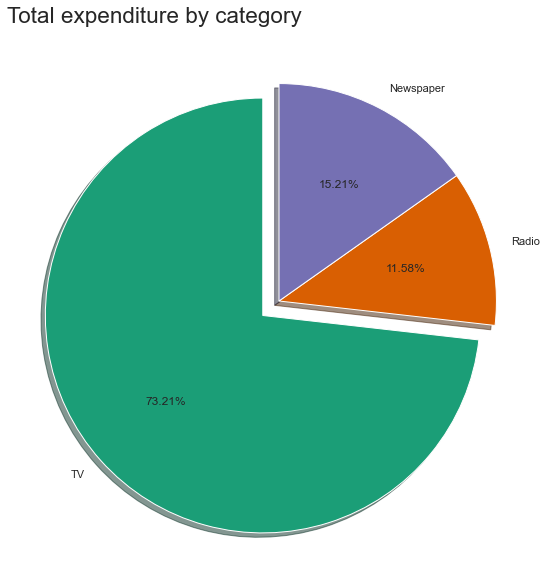

In [84]:
# Variable for plot
explode = (0.1, 0, 0)
# Plotting a pie diagram
fig = plt.figure(figsize=(10, 10))
plt.pie(ad.loc[:,['TV', 'Radio', 'Newspaper']].sum(), explode=explode,  shadow=True, startangle=90, labels = ['TV', 'Radio', 'Newspaper'], autopct='%1.2f%%')
plt.title(label="Total expenditure by category",
          loc="left",
          fontsize=22.5)

plt.show()

### Insights:
*   By total volume company spends 73.21% of it's total budget on TV Adv.
*   When we analyse the aggregate statistic parameters, TV Adv. also supercedes the other categories
*   Range of 3 of the categories are as follows in the above order
    - 0.7 - 297 [TV]
    - 0 - 50 [Radio]
    - 0 - 115 [News Paper]
* Except Newspaper rest of the features' Mean and Median are almost same.

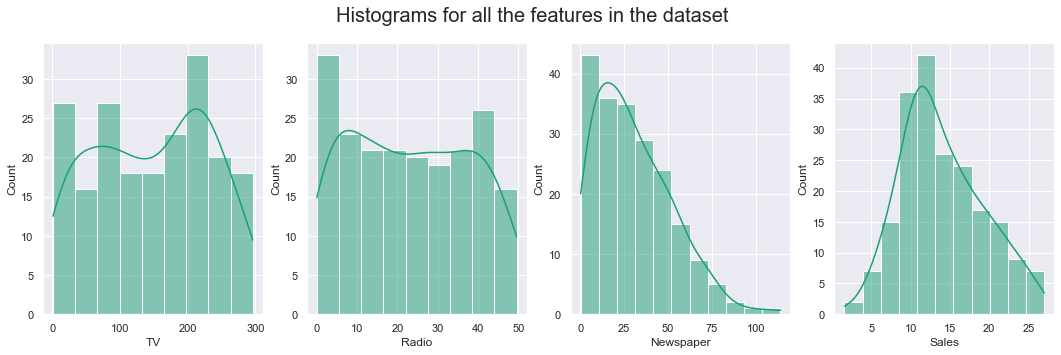

In [123]:
# select the columns to be plotted
cols = ad.columns.to_list()
# create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(18.125, 5))
# Setting the sns plot theme
sns.set_theme(style="darkgrid", palette="Dark2")
# Giving a plot title
fig.suptitle('Histograms for all the features in the dataset', fontsize=20)
# For making indexing easier, creating a contiguous flattened array
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(data=ad[col], kde=True, ax=ax)

plt.show()

### Insights from Histograms :
*   The frequency distribution of TV and Radio are Uniform in nature. And Sales distribution is almost symmetrical.
*   The frequency distribution of Newspaper is right skewed.

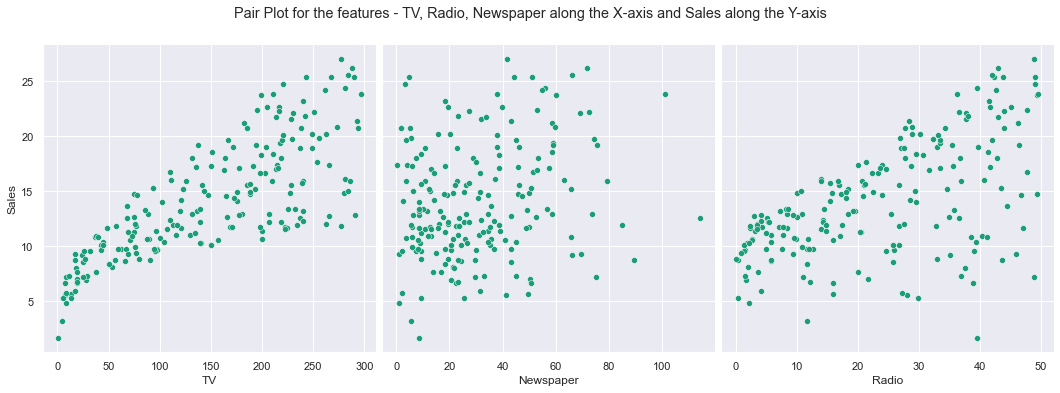

In [125]:
sns.set_theme(style="darkgrid", palette="Dark2")
ax = sns.pairplot(ad, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, kind='scatter')
# Giving a plot title
ax.fig.suptitle("Pair Plot for the features - TV, Radio, Newspaper along the X-axis and Sales along the Y-axis", y=1.08) # y = Height > 1
plt.show()

### Insights from pairplot :
*   The values for the feature - TV are least scattered or in other words, advertising on TV did good for the Sales.
*   The values for the feature - Newspaper are widely scattered.

### T3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper).

- **Define Hypothesis**
  
    ***If the same amount was spent for the three advertisements, definitely their mean will be same***


    *   The Null Hypothesis, ***H(0) - The Means are equal***
    *   The Alternative Hypothesis, ***H(a) - At least, one group mean is different from other groups***
    *   Significance level = 5%
    *   Here, we are doing **One-way ANOVA Test**

- **Determining F-critical Value**

    ***To be able to determine F-critical value, we need:***

    *   Significance level
    *   df1 = k-1 (dfn — degrees of freedom nominator)
    *   df2 = N-k (dfd — degrees of freedom denominator)

    ***where k = number of the groups, N = number of total observations.***

In [126]:
from scipy.stats import f 
dfn = 2
dfd = 197
f_crit = f.ppf(1-0.05,dfn,dfd)
print('F-critical=',f_crit)

F-critical= 3.041753029984693


- **Finding F-statistics and P-value**

In [132]:
fvalue, pvalue = scipy.stats.f_oneway(ad['TV'], ad['Radio'], ad['Newspaper'])
print('F-Statistic=',fvalue,'\nP-value=',pvalue)
if(pvalue<=0.05):
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

F-Statistic= 358.8514595342597 
P-value= 4.552931539744962e-103
We reject null hypothesis


### Insights :


*  Since the **P-Value is smaller than the level of significance** , we reject our Null Hypothesis.
*  Also, **the F-statistics is greater than the F-ciritical**, leads to the rejection of our Null Hypothesis.
*  Thus, we conclude that - **At least, one group mean is different from other groups** OR **The amount spent for the three advertisement was different.**

***End of the file reached***